# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
record=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]


for city in cities:
    response = requests.get(f"{url}&q={city}")
    try:
        response.raise_for_status()
        response_json=response.json()
        #print(response_json)
        city_name.append(response_json["name"])
        #city_record=response_json["name"]
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        max_temp.append(response_json["main"]["temp_max"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        wind_speed.append(response_json["wind"]["speed"])
        print(f"Processing Record {record} | {response_json['name']}")
        record=record+1
    except requests.exceptions.HTTPError as e:
        print(f"City not found. Skipping")
    #continue
    

Processing Record 1 | Abu Zabad
Processing Record 2 | Mataura
Processing Record 3 | Jamestown
Processing Record 4 | Narsaq
City not found. Skipping
Processing Record 5 | Chimbote
Processing Record 6 | Hofn
Processing Record 7 | Avarua
Processing Record 8 | Norman Wells
Processing Record 9 | Cape Town
Processing Record 10 | Maniitsoq
Processing Record 11 | Longyearbyen
City not found. Skipping
Processing Record 12 | Severo-Kurilsk
Processing Record 13 | Bluff
Processing Record 14 | Georgetown
Processing Record 15 | Hobart
Processing Record 16 | Havelock
Processing Record 17 | Lakes Entrance
Processing Record 18 | Ambulu
City not found. Skipping
Processing Record 19 | Airai
Processing Record 20 | Rikitea
Processing Record 21 | Port Shepstone
Processing Record 22 | Launceston
Processing Record 23 | Bosaso
Processing Record 24 | Iqaluit
Processing Record 25 | Ushuaia
City not found. Skipping
Processing Record 26 | East London
Processing Record 27 | Punta Arenas
Processing Record 28 | Saint

Processing Record 225 | Zhangjiakou
Processing Record 226 | Bath
Processing Record 227 | Uthal
City not found. Skipping
Processing Record 228 | Namatanai
Processing Record 229 | Sal Rei
Processing Record 230 | Saint-Joseph
Processing Record 231 | Kiunga
Processing Record 232 | Alice Springs
Processing Record 233 | Port Moresby
Processing Record 234 | Smithers
City not found. Skipping
Processing Record 235 | Jiazi
Processing Record 236 | Ust-Omchug
Processing Record 237 | Fort Saint James
City not found. Skipping
Processing Record 238 | Staryy Nadym
Processing Record 239 | La Spezia
City not found. Skipping
Processing Record 240 | Vestmanna
City not found. Skipping
Processing Record 241 | Pitea
Processing Record 242 | Butaritari
Processing Record 243 | Nanortalik
Processing Record 244 | Aklavik
Processing Record 245 | Grindavik
Processing Record 246 | Marawi
Processing Record 247 | San Rafael
Processing Record 248 | Nogales
City not found. Skipping
City not found. Skipping
Processing Re

Processing Record 444 | Montepuez
Processing Record 445 | Turayf
Processing Record 446 | Wajima
Processing Record 447 | Muisne
Processing Record 448 | Nabire
Processing Record 449 | Nishihara
Processing Record 450 | Sinjar
Processing Record 451 | Makasar
Processing Record 452 | Fairbanks
Processing Record 453 | Quatre Cocos
Processing Record 454 | Lancaster
Processing Record 455 | Puerto del Rosario
Processing Record 456 | Chuy
Processing Record 457 | Phalodi
Processing Record 458 | Santo Andre
Processing Record 459 | Coria
Processing Record 460 | Iranshahr
Processing Record 461 | Le Port
Processing Record 462 | Mason City
Processing Record 463 | Tezu
Processing Record 464 | Nata
Processing Record 465 | Oussouye
Processing Record 466 | Fortuna
Processing Record 467 | Saint-Augustin
Processing Record 468 | Sangar
Processing Record 469 | Santiago
Processing Record 470 | Tigil
Processing Record 471 | Acapulco
Processing Record 472 | Almeirim
Processing Record 473 | Veranopolis
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather_dict={"City":city_name,
               "Cloudiness":cloudiness,
                "Country":country,
                 "Date":date,
                  "Humidity":humidity,
                   "Lat":lat,
                    "Lng":lng,
                     "Max Temp":max_temp,
                      "Wind Speed":wind_speed}
weather_data=pd.DataFrame(weather_dict)
city_count=weather_data["City"].count()
#print(city_count)
cloudiness_count=weather_data["Cloudiness"].count()
#print(cloudiness_count)   
country_count=weather_data["Country"].count()
date_count=weather_data["Date"].count()
humidity_count=weather_data["Humidity"].count()
lat_count=weather_data["Lat"].count()
lng_count=weather_data["Lng"].count()
maxTemp_count=weather_data["Max Temp"].count()
windSpeed_count=weather_data["Wind Speed"].count()
total_count={"City":[city_count],
              "Cloudiness":[cloudiness_count],
              "Country":[country_count],
              "Date":[date_count],
              "Humidity":[humidity_count],
              "Lat":[lat_count],
              "Lng":[lng_count],
              "Max Temp":[maxTemp_count],
              "Wind Speed":[windSpeed_count]}
total_count_pd=pd.DataFrame(total_count)
total_count_pd

City  Cloudiness  Country  Date  Humidity  Lat  Lng  Max Temp  Wind Speed
0   559         559      559   559       559  559  559       559         559

In [5]:
weather_data.to_csv("output_data_file")
weather_data.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0  Abu Zabad          60      SD  1561572653        83  12.35   29.25   
1    Mataura          74      NZ  1561572653        82 -46.19  168.86   
2  Jamestown           0      AU  1561572603        65 -33.21  138.60   
3     Narsaq          75      GL  1561572654        93  60.91  -46.05   
4   Chimbote         100      PE  1561572655        87  -9.08  -78.59   

   Max Temp  Wind Speed  
0   297.024       10.27  
1   282.040        2.68  
2   284.424        6.11  
3   283.150        2.10  
4   290.124        3.87

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude vs.Max Temperature(08/22/18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs.Max Temperature.png")

#### Latitude vs. Humidity Plot

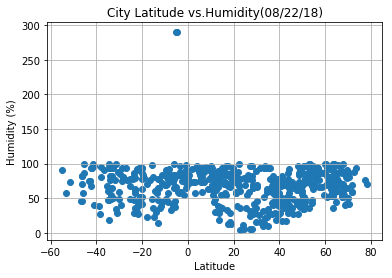

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude vs.Humidity(08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs.Humidity.png")

#### Latitude vs. Cloudiness Plot

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude vs.Cloudiness(08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs.Cloudiness.png")

#### Latitude vs. Wind Speed Plot

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude vs.Wind Speed(08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs.Wind Speed.png")

Observation:
    1.Latitude is the distance of the location of the Earth from the equator.The further away from the equator that you are the less sunlight that this location receives.We can conclude our observation by analyzing the"City Latitude vs.Max Temperature" curve,temp is more near the equator and gradually decrease when it's away from it.(One observation Temp value is showing crazy in the plot more than 300F in Y axix,my thought it might receiving wrong data from the weather API)
    2.The relative humidity is higher at polar regions than at 30o latitude,while the specific humidity is higher at 30o than at polar region.Our Latitude vs Humitidy curve shows one odd data and remaining all datas are clustered near equator.
    3.Cloudiness and Wind speed is difficult to predict as all the datas are scatter through out the region.But sometimes wind speed is increasing as it's going away from the equator as per the curve.